<a href="https://colab.research.google.com/github/Susovan88/Machine_Learning/blob/main/Linear%20Regression/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

data=load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [21]:
x=data.data
y=data.target

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,root_mean_squared_error

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

lr=LinearRegression()
lr.fit(x_train,y_train)

print(lr.coef_)
print(lr.intercept_)

y_pred=lr.predict(x_test)

print("r2 : ",r2_score(y_test,y_pred))
print("rmse : ",root_mean_squared_error(y_test,y_pred))

[ -2.6390011  -10.87646164  26.27230368  16.98933629 -36.20483217
  20.88847451   4.56338925   8.88463457  34.37497437   5.40776313]
153.3541076487252
r2 :  0.3852693902152977
rmse :  55.75127876997795


In [34]:
from sklearn.linear_model import Ridge

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

lr=Ridge(alpha=10)
lr.fit(x_train,y_train)

print(lr.coef_)
print(lr.intercept_)

y_pred=lr.predict(x_test)

print("r2 : ",r2_score(y_test,y_pred))
print("rmse : ",root_mean_squared_error(y_test,y_pred))

[ -2.35737358 -10.34068352  25.8501814   16.65193034  -9.15836568
  -0.11777556  -7.07746583   5.97730266  23.74148535   5.67039012]
153.3541076487252
r2 :  0.38239195511361923
rmse :  55.88160691491116


In [44]:
class MyRidge:
  def __init__(self,alpha=0.1):
      self.m=None
      self.b=None
      self.alpha=alpha

  def fit(self,x_train,y_train):
    num=0
    den=0
    for i in range(x_train.shape[0]):
      num=num+((y_train[i]-y_train.mean())*(x_train[i]-x_train.mean()))
      den=den+((x_train[i]-x_train.mean())*(x_train[i]-x_train.mean()))

    self.m=num/(den+ self.alpha)
    self.b=y_train.mean()-(self.m*x_train.mean())

  def predict(self,x_test):
    y_pred=self.m*x_test+self.b
    return y_pred

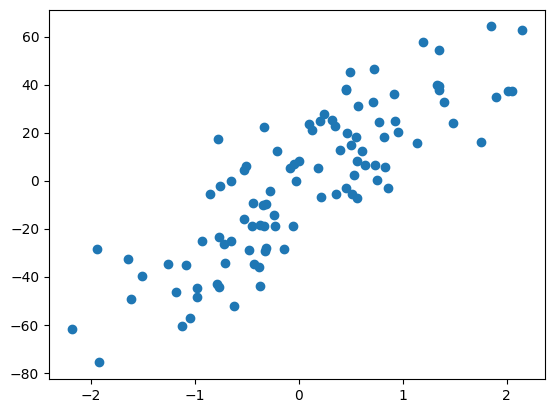

In [72]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
x,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(x,y)

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

lr=LinearRegression()
lr.fit(x_train,y_train)

print(lr.coef_)
print(lr.intercept_)

y_pred=lr.predict(x_test)

print("r2 : ",r2_score(y_test,y_pred))
print("rmse : ",root_mean_squared_error(y_test,y_pred))

[28.07637482]
-3.5542386451751105
r2 :  0.33021406456623015
rmse :  16.490316711442436


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

lr=MyRidge(alpha=18)
lr.fit(x_train,y_train)

print(lr.m)
print(lr.b)

y_pred=lr.predict(x_test)

print("r2 : ",r2_score(y_test,y_pred))
print("rmse : ",root_mean_squared_error(y_test,y_pred))

[22.92579806]
[-3.34984798]
r2 :  0.3325252568941036
rmse :  16.46184102519731


alpha =  1   ->  [27.7302658] [-3.54050398]
r2 :  0.33175376921214783
rmse :  16.471351826939767
alpha =  10   ->  [24.96093259] [-3.43060835]
r2 :  0.33689059841881774
rmse :  16.407921802103246
alpha =  18   ->  [22.92579806] [-3.34984798]
r2 :  0.3325252568941036
rmse :  16.46184102519731
alpha =  30   ->  [20.42752798] [-3.25070897]
r2 :  0.3177374807589842
rmse :  16.643196534031542
alpha =  100   ->  [12.48878314] [-2.93567526]
r2 :  0.2017652426159794
rmse :  18.002229833370173


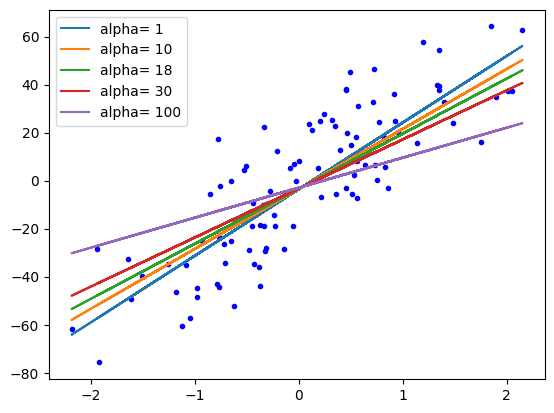

In [81]:
def testUsing_diff_alpha(x,y,alpha):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

    plt.plot(x,y,'b.')
    for i in range(alpha.shape[0]):
      lr=MyRidge(alpha=alpha[i])
      lr.fit(x_train,y_train)

      y_pred=lr.predict(x_test)
      print("alpha = ",alpha[i],"  -> ",lr.m,lr.b)
      print("r2 : ",r2_score(y_test,y_pred))
      print("rmse : ",root_mean_squared_error(y_test,y_pred))

      plt.plot(x,lr.predict(x),label=f"alpha= {alpha[i]}")

    plt.legend()


testUsing_diff_alpha(x,y,np.array([1,10,18,30,100]))

**Ridge Regression for n dimension data**

In [89]:
## Normally, Ridge does not penalize the intercept.
##If you add a column of ones, the identity matrix I will also penalize that first column.
## Fix → set I[0,0] = 0 so the intercept is not regularized.

class MyRidge_nDimension:
  def __init__(self,alpha=0.1):
      self.coef_=None
      self.intercept_=None
      self.alpha=alpha

  def fit(self,x_train,y_train):
    x_train=np.insert(x_train,0,1,axis=1)
    I=np.identity(x_train.shape[1])
    I[0,0]=0  ##  so the intercept is not regularized.
    result=np.linalg.inv((x_train.T.dot(x_train))+self.alpha * I).dot(np.dot(x_train.T,y_train))
    self.coef_=result[1:]
    self.intercept_=result[0]

  def predict(self,x_test):
    return np.dot(x_test,self.coef_) + self.intercept_

In [92]:
from sklearn.datasets import load_diabetes
x,y = load_diabetes(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

lr=MyRidge_nDimension(alpha=6)
lr.fit(x_train,y_train)

print(lr.coef_)
print(lr.intercept_)

y_pred=lr.predict(x_test)

print("r2 : ",r2_score(y_test,y_pred))
print("rmse : ",root_mean_squared_error(y_test,y_pred))

[ -2.44607431 -10.52830495  26.0657526   16.79252145 -12.69381931
   2.5507387   -5.63313049   6.25556348  25.29111985   5.59477852]
153.35410764872526
r2 :  0.38267442234690174
rmse :  55.86882653724871
